In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('Data/Traffic_Data.csv') 

In [3]:
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

Dataset Shape: (105850, 13)

First few rows:


,Date,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,01-01-2022,NaN,0.669419,0.392949,NaN,0.261627,0.844939,0.6,0.520505,0.482751,0.601266,Mild,1.0
1,01-01-2022,CST Road,0.775431,0.000000,0.536212,0.615160,0.035331,0.8,0.137807,0.394751,0.588608,Mild,1.0
2,01-01-2022,"Road no. 01, TPS V",0.632111,0.000000,0.969972,0.673203,0.975692,NaN,0.478489,0.071569,0.468354,Mild,0.0
3,01-01-2022,Vakola Pipeline Road,0.456201,0.598162,NaN,0.259642,0.345587,0.4,0.271353,NaN,0.392405,NaN,0.0
4,NaN,St Anthony Road,0.234796,0.000000,0.622437,NaN,0.663442,0.8,0.470199,0.003909,0.215190,Mild,0.0


In [4]:
print(df.describe())

       Traffic Volume  Average Speed  Travel Time Index  Congestion Level  \
count    95837.000000   95819.000000       95705.000000      95801.000000   
mean         0.526741       0.113058           0.486112          0.554224   
std          0.196098       0.190125           0.208540          0.261997   
min          0.000000       0.000000           0.000000          0.000000   
25%          0.371986       0.000000           0.334179          0.337203   
50%          0.526842       0.000000           0.486147          0.558979   
75%          0.682344       0.176083           0.638526          0.778259   
max          1.000000       1.000000           1.000000          1.000000   

       Road Capacity Utilization  Incident Reports  Environmental Impact  \
count               95764.000000      95841.000000          95632.000000   
mean                    0.499977          0.449989              0.291229   
std                     0.289019          0.296218              0.150401   
mi

In [5]:
print("\nData Types:")
display(df.dtypes)
print("\nMissing Values:")
display(df.isnull().sum())


Data Types:


Date                                   object
Road/Intersection Name                 object
Traffic Volume                        float64
Average Speed                         float64
Travel Time Index                     float64
Congestion Level                      float64
Road Capacity Utilization             float64
Incident Reports                      float64
Environmental Impact                  float64
Public Transport Usage                float64
Pedestrian and Cyclist Count          float64
Weather Conditions                     object
Roadwork and Construction Activity    float64
dtype: object


Missing Values:


Date                                  10061
Road/Intersection Name                10146
Traffic Volume                        10013
Average Speed                         10031
Travel Time Index                     10145
Congestion Level                      10049
Road Capacity Utilization             10086
Incident Reports                      10009
Environmental Impact                  10218
Public Transport Usage                10000
Pedestrian and Cyclist Count           9847
Weather Conditions                    10160
Roadwork and Construction Activity    10115
dtype: int64

## Data Cleaning

In [6]:
df['Traffic Volume'] = df['Traffic Volume'].interpolate(method='linear')

In [7]:
df['Weather Conditions'].fillna(df['Weather Conditions'].mode()[0], inplace=True)

C:\Users\Soham\AppData\Local\Temp\ipykernel_22844\1055074250.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather Conditions'].fillna(df['Weather Conditions'].mode()[0], inplace=True)


In [8]:
df['Average Speed'].fillna(df['Average Speed'].mean(), inplace=True)

C:\Users\Soham\AppData\Local\Temp\ipykernel_22844\2525100194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average Speed'].fillna(df['Average Speed'].mean(), inplace=True)


In [9]:
df['Date'].fillna(method='ffill', inplace=True)

C:\Users\Soham\AppData\Local\Temp\ipykernel_22844\3572410786.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(method='ffill', inplace=True)
C:\Users\Soham\AppData\Local\Temp\ipykernel_22844\3572410786.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'].fillna(method='ffill', inplace=True)


In [10]:
df['Road/Intersection Name'].fillna(method='ffill', inplace=True)

C:\Users\Soham\AppData\Local\Temp\ipykernel_22844\782937216.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Road/Intersection Name'].fillna(method='ffill', inplace=True)
C:\Users\Soham\AppData\Local\Temp\ipykernel_22844\782937216.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Road/Intersection Name'].fillna(method='ffill', inplace=True)


In [11]:
df['Travel Time Index'] = df['Travel Time Index'].interpolate(method='linear')

In [12]:
df['Congestion Level'] = df['Congestion Level'].interpolate(method='linear')

In [13]:
df['Road Capacity Utilization'] = df['Road Capacity Utilization'].interpolate(method='linear')

In [14]:
df['Incident Reports'].fillna(df['Incident Reports'].mode()[0], inplace=True)

C:\Users\Soham\AppData\Local\Temp\ipykernel_22844\3827230808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Incident Reports'].fillna(df['Incident Reports'].mode()[0], inplace=True)


In [15]:
df['Environmental Impact'] = df['Environmental Impact'].interpolate(method='linear')

In [16]:
df['Public Transport Usage'] = df['Public Transport Usage'].fillna(df['Public Transport Usage'].rolling(7, min_periods=1).mean())

In [17]:
df['Pedestrian and Cyclist Count'] = df['Pedestrian and Cyclist Count'].interpolate(method='linear')

In [18]:
df['Roadwork and Construction Activity'].fillna(df['Roadwork and Construction Activity'].mode()[0], inplace=True)

C:\Users\Soham\AppData\Local\Temp\ipykernel_22844\3203251860.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Roadwork and Construction Activity'].fillna(df['Roadwork and Construction Activity'].mode()[0], inplace=True)


In [19]:
df.isnull().sum()

Date                                  0
Road/Intersection Name                1
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     1
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

Date                                  0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64

## DATA Exploring

In [22]:
df.head()

,Date,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
1,01-01-2022,CST Road,0.775431,0.000000,0.536212,0.615160,0.035331,0.8,0.137807,0.394751,0.588608,Mild,1.0
2,01-01-2022,"Road no. 01, TPS V",0.632111,0.000000,0.969972,0.673203,0.975692,0.4,0.478489,0.071569,0.468354,Mild,0.0
3,01-01-2022,Vakola Pipeline Road,0.456201,0.598162,0.796204,0.259642,0.345587,0.4,0.271353,0.316357,0.392405,Mild,0.0
4,01-01-2022,St Anthony Road,0.234796,0.000000,0.622437,0.377791,0.663442,0.8,0.470199,0.003909,0.215190,Mild,0.0
5,01-01-2022,Mahalaxmi Mandir Road,0.363325,0.298971,0.466867,0.495939,0.862246,0.6,0.245352,0.675474,0.810127,Mild,0.0


In [23]:
print(df['Weather Conditions'].unique())

['Mild' 'Clear' 'Fog' 'Hot and Humid' 'Heatwave' 'Rainy' 'Thunderstorm']


In [24]:
print(df['Road/Intersection Name'].nunique())
print(df['Road/Intersection Name'].unique()) 

283
['CST Road ' 'Road no. 01, TPS V' 'Vakola Pipeline Road' 'St Anthony Road'
 'Mahalaxmi Mandir Road' 'Rajendra Kamble Road' "Sant Mary's Road"
 'Chetana College Road' 'New English School Marg' 'Samaj Mandir Hall Marg'
 'J L Shirshekar Marg' 'Road no. 07, TPS III' 'Road No. 06, TPS III'
 'Road No. 04, TPS III' 'Road no. 11, TPS V' 'Ram Mandir Road'
 'Khar Pipeline Road' 'Aaram Society Road'
 'Side strips of Jawaharlal Nehru Road' 'Vijay Nagar Road'
 'Parshiwadi Road' 'Manipada Road' 'Shardadevi Marg'
 'Road no. 08, TPS III' 'Takshila Marg' 'Dnyaneshwar Mandir Marg'
 'Abbasaheb Shinde Marg' 'Sunder Nagar Road no. 01'
 'Sunder Nagar Road no. 02' 'Sunder Nagar Road no. 03'
 'Ramanath Parkar Marg' 'Khernagar Road no. 01' 'Khernagar Road no. 02'
 'Khernagar Road no. 03' 'Khernagar Road no. 04' 'Khernagar Road no. 06'
 'Khernagar Road no. 07' 'Khernagar Road no. 08' 'Bhai Tambe Marg'
 'V.M. Bhargav Road' 'Sidestrip of Juhu Road' 'SS of Kanubhai Desai Marg'
 '11th Road, Khar West ' 'Gurugan

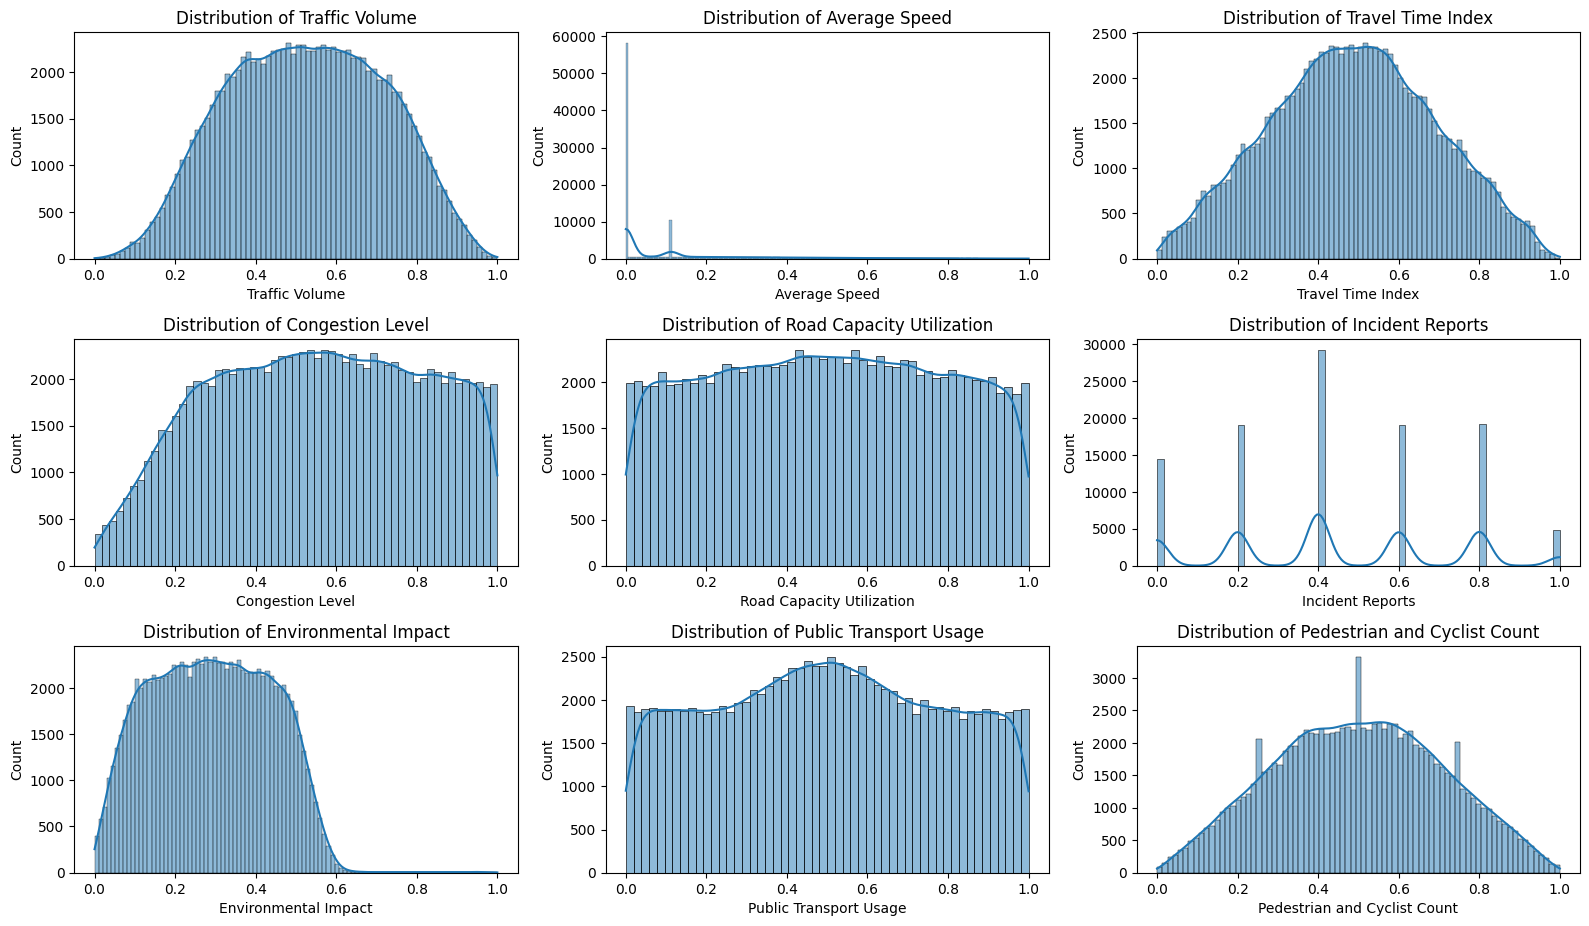

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns = ["Traffic Volume", "Average Speed", "Travel Time Index", "Congestion Level",
                     "Road Capacity Utilization", "Incident Reports", "Environmental Impact", 
                     "Public Transport Usage",  
                     "Pedestrian and Cyclist Count"]

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Feature Engineering

In [26]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

### Encode categorical variables

In [27]:
le_road = LabelEncoder()
le_weather = LabelEncoder()
df['Road_Encoded'] = le_road.fit_transform(df['Road/Intersection Name'])
df['Weather_Encoded'] = le_weather.fit_transform(df['Weather Conditions'])

In [28]:
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

In [29]:
print("Transformed data head:")
display(df.head())

Transformed data head:


,Date,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,Road_Encoded,Weather_Encoded,Month,DayOfWeek,IsWeekend
1,2022-01-01,CST Road,0.775431,0.000000,0.536212,0.615160,0.035331,0.8,0.137807,0.394751,0.588608,Mild,1.0,43,4,1,5,1
2,2022-01-01,"Road no. 01, TPS V",0.632111,0.000000,0.969972,0.673203,0.975692,0.4,0.478489,0.071569,0.468354,Mild,0.0,201,4,1,5,1
3,2022-01-01,Vakola Pipeline Road,0.456201,0.598162,0.796204,0.259642,0.345587,0.4,0.271353,0.316357,0.392405,Mild,0.0,270,4,1,5,1
4,2022-01-01,St Anthony Road,0.234796,0.000000,0.622437,0.377791,0.663442,0.8,0.470199,0.003909,0.215190,Mild,0.0,240,4,1,5,1
5,2022-01-01,Mahalaxmi Mandir Road,0.363325,0.298971,0.466867,0.495939,0.862246,0.6,0.245352,0.675474,0.810127,Mild,0.0,131,4,1,5,1


In [30]:
df.to_csv('Data/Cleaned_Data.csv', index=False)

### Create Train-Test Split

In [31]:
features = [
    'Road_Encoded', 'Month', 'DayOfWeek', 'IsWeekend',
    'Average Speed', 'Travel Time Index', 'Congestion Level',
    'Road Capacity Utilization', 'Incident Reports',
    'Environmental Impact', 'Public Transport Usage',
    'Pedestrian and Cyclist Count', 'Weather_Encoded',
    'Roadwork and Construction Activity'
]

In [32]:
X = df[features]
y = df['Traffic Volume']

In [33]:
train_size = int(len(df) * 0.8)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

## LSTM

In [34]:
def create_sequences(X, y, time_steps=30):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [35]:
X_train_seq, y_train_seq = create_sequences(X_train, y_train)
X_test_seq, y_test_seq = create_sequences(X_test, y_test)


In [36]:
print("LSTM sequence shapes:")
print("X_train_seq shape:", X_train_seq.shape)
print("y_train_seq shape:", y_train_seq.shape)
print("X_test_seq shape:", X_test_seq.shape)
print("y_test_seq shape:", y_test_seq.shape)

LSTM sequence shapes:
X_train_seq shape: (84649, 30, 14)
y_train_seq shape: (84649,)
X_test_seq shape: (21140, 30, 14)
y_test_seq shape: (21140,)


## XGBoost

In [37]:
print("\nXGBoost data shapes:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


XGBoost data shapes:
X_train shape: (84679, 14)
X_test shape: (21170, 14)


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

### Build LSTM model

In [39]:
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(30, 14), return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

C:\Users\Soham\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
lstm_model.compile(optimizer='adam', loss='mse')

In [ ]:
history = lstm_model.fit(
    X_train_seq, y_train_seq,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 101s 43ms/step - loss: 43.9967 - val_loss: 0.1522
Epoch 2/10
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 95s 45ms/step - loss: 0.1155 - val_loss: 0.0941
Epoch 3/10
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 94s 44ms/step - loss: 0.0822 - val_loss: 0.0448
Epoch 4/10
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 96s 45ms/step - loss: 0.0574 - val_loss: 0.0379
Epoch 5/10
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 97s 46ms/step - loss: 0.0379 - val_loss: 0.0374
Epoch 6/10
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 100s 47ms/step - loss: 0.0380 - val_loss: 0.0375
Epoch 7/10
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 93s 44ms/step - loss: 0.0375 - val_loss: 0.0369
Epoch 8/10
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 130s 61ms/step - loss: 0.0442 - val_loss: 0.0369
Epoch 9/10
 791/2117 ━━━━━━━━━━━━━━━━━━━━ 54s 41ms/step - loss: 0.0367

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
xgb_model.fit(X_train, y_train)

In [ ]:
def hybrid_predict(lstm_model, xgb_model, X_seq, X):
    lstm_pred = lstm_model.predict(X_seq).flatten()
    xgb_pred = xgb_model.predict(X)
    return (lstm_pred + xgb_pred) / 2

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = hybrid_predict(lstm_model, xgb_model, X_test_seq, X_test[-len(X_test_seq):])
mse = mean_squared_error(y_test_seq, y_pred)
r2 = r2_score(y_test_seq, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

In [ ]:
def predict_traffic(road_name, future_date):
    road_encoded = le_road.transform([road_name])[0]
    date = pd.to_datetime(future_date)
    

    features = [road_encoded, date.month, date.dayofweek, date.dayofweek in [5, 6]]

    features.extend([0] * 10)
    
    X_seq = np.array([features] * 30).reshape(1, 30, 14)
    X = np.array(features).reshape(1, -1)
    
    prediction = hybrid_predict(lstm_model, xgb_model, X_seq, X)
    return prediction[0]

In [ ]:
import matplotlib.pyplot as plt

feature_importance = xgb_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)
sorted_features = feature_names[sorted_idx]

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx])
plt.yticks(range(len(feature_importance)), sorted_features)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

for feature, importance in zip(sorted_features, feature_importance[sorted_idx]):
    print(f"{feature}: {importance}")

In [ ]:
# Save LSTM model
lstm_model.save('lstm_traffic_model.h5')
# Save XGBoost model
import joblib
joblib.dump(xgb_model, 'xgb_traffic_model.joblib')

# Save the LabelEncoders
joblib.dump(le_road, 'le_road.joblib')
joblib.dump(le_weather, 'le_weather.joblib')

In [ ]:
def predict_traffic_xgb(road_name, future_date, weather_condition='normal'):
    # Load the model and label encoders
    xgb_model = joblib.load('xgb_traffic_model.joblib')
    le_road = joblib.load('le_road.joblib')
    le_weather = joblib.load('le_weather.joblib')
    
    # Convert inputs to model features
    # Handle unseen road names
    if road_name in le_road.classes_:
        road_encoded = le_road.transform([road_name])[0]
    else:
        print(f"Warning: '{road_name}' is an unseen road name. Using -1 as a placeholder.")
        road_encoded = -1
    
    date = pd.to_datetime(future_date)
    
    # Handle unseen weather conditions
    if weather_condition in le_weather.classes_:
        weather_encoded = le_weather.transform([weather_condition])[0]
    else:
        print(f"Warning: '{weather_condition}' is an unseen weather condition. Using the most frequent condition.")
        weather_encoded = le_weather.transform([le_weather.classes_[0]])[0]
    
    # Create feature vector (adjust this based on your actual features)
    features = [
        road_encoded, 
        date.month, 
        date.dayofweek, 
        int(date.dayofweek in [5, 6]),  # IsWeekend
        0, 0, 0, 0, 0, 0, 0, 0,  # Placeholder values for other features
        weather_encoded,
        0  # Placeholder for 'Roadwork and Construction Activity'
    ]
    
    # Make prediction
    X = np.array(features).reshape(1, -1)
    prediction = xgb_model.predict(X)
    
    return prediction[0]

In [ ]:
# Example usage
try:
    predicted_traffic = predict_traffic_xgb("Mahalaxmi Mandir Road", "2024-02-21", "Clear")
    print(f"Predicted traffic volume: {predicted_traffic}")
except Exception as e:
    print(f"Error making prediction: {e}")

In [ ]:
df['Weather Conditions'].unique()